### Import

In [248]:
import os
import sys
import numpy as np
import pandas as pd
import shapefile 
import matplotlib.pyplot as plt

### Load Shapefile

In [249]:
geostates = shapefile.Reader('../../../data/tl_2017_us_state/tl_2017_us_state_lite_noDC.shp')

### Get all state names

In [250]:
states = []
data = []
for root, dirs, files in os.walk("../../../data/statebased_corrected", topdown=False):
    for name in files:
        if ('.csv' in name and 'Columbia' not in name):
            states.append(name[:-4])
states = np.sort(states)

### Load Data

In [251]:
D = {}
C = np.zeros((len(states),len(states)))
for s,state in enumerate(states):
    data = pd.read_csv('../../../data/statebased_corrected/' + state + '.csv')  
    data['level'] = data['level'].bfill().ffill()
    D[state] = data

### Calculate Crosscorrelations

In [252]:
for s1,state1 in enumerate(states):
    data1 = D[state1]
    level1 = data1['level'].values.astype('float')
    for s2,state2 in enumerate(states):
        data2 = D[state2]
        level2 = data2['level'].values.astype('float')
        x = np.correlate(level1,level2,'full')
        index = np.argmax(x) - 588
        C[s1,s2] = index

### Plot Connectivity Matrix

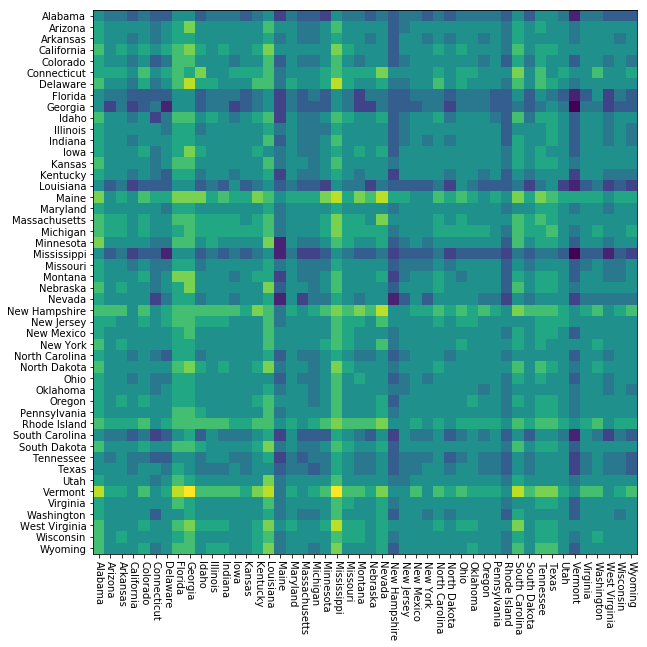

In [253]:
plt.figure(figsize=(10,10))
plt.imshow(C);
plt.xticks(range(len(states)),labels=states,rotation=-90);
plt.yticks(range(len(states)),labels=states);

### Plot State Map

Wyoming


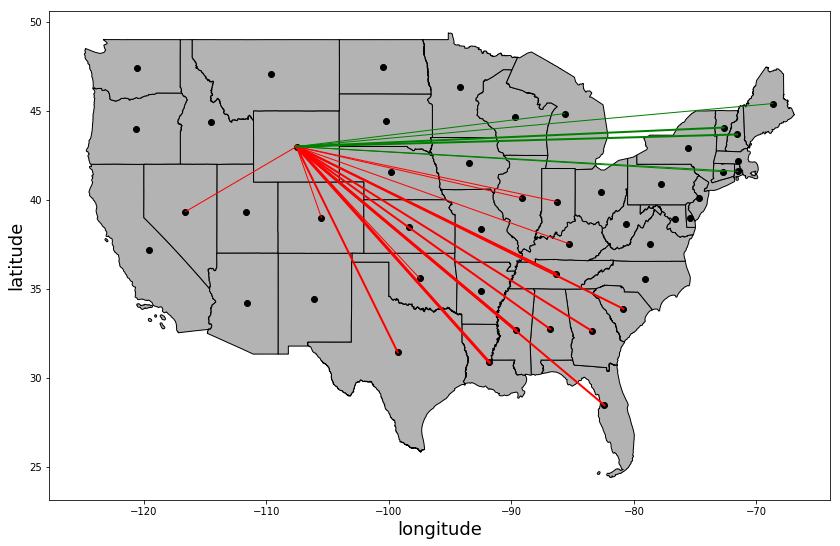

In [291]:
plt.figure(figsize=((14,9)))
for s,sr in enumerate(geostates.shapeRecords()):
    state = sr.record[6]
    data = D[state]
    mean_level = np.mean((data['level'].values - 1.0) / 9.0) * 3
    xcentroid = data['longitude'].values[0]
    ycentroid = data['latitude'].values[0]
    parts = list(sr.shape.parts)
    points = sr.shape.points
    points = np.array(points)
    parts.append(len(points))
    for i in range(len(parts)-1):
        startP = parts[i]
        endP = parts[i+1]
        listx = points[startP:endP,0]
        listy = points[startP:endP,1]
        #plt.fill(listx[:],listy[:],fc=(0,mean_level**2,1-mean_level),ec=(0,0,0),zorder=0)
        plt.fill(listx[:],listy[:],fc=(0.7,0.7,0.7),ec=(0,0,0),zorder=0)
    plt.scatter(ycentroid,xcentroid,c='k')
plt.xlabel('longitude',fontsize=18)
plt.ylabel('latitude',fontsize=18)

lstates = list(states)
i = lstates.index('Wyoming')
print(states[i])
state1 = states[i]
data1 = D[state1]
lat1 = data1['latitude'].values[0]
lng1 = data1['longitude'].values[0]
for j in range(len(states)):
    state2 = states[j]
    strength = C[j,i]
    data2 = D[state2]
    lat2 = data2['latitude'].values[0]
    lng2 = data2['longitude'].values[0]
    if (strength < 0):
        plt.plot([lat1,lat2],[lng1,lng2],c='r',linewidth=np.abs(strength))            
    if (strength > 0):
        plt.plot([lat1,lat2],[lng1,lng2],c='g',linewidth=np.abs(strength))